# Chapter 2

## Section 2.1

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
data = pd.Series(np.array([2, 2, 4, 6, 4, 5, 2, 3, 1, 2, 0, 4, 3, 3, 3, 3, 4, 2, 7, 2, 4, 3, 3, 3, 4,
                     3, 7, 5, 3, 1, 7, 6, 4, 6, 5, 2, 4, 7, 2, 2, 6, 2, 4, 5, 4, 5, 1, 3, 2, 3]))

In [21]:
len(data)

50

In [22]:
data.describe()

count    50.00000
mean      3.56000
std       1.72804
min       0.00000
25%       2.00000
50%       3.00000
75%       4.75000
max       7.00000
dtype: float64

In [23]:
data.value_counts(sort=False)

0     1
1     3
2    11
3    12
4    10
5     5
6     4
7     4
dtype: int64

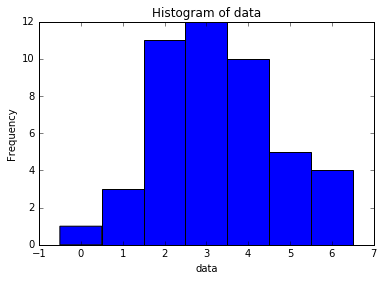

In [32]:
plt.hist(data, bins=np.arange(-0.5, 7.5, 1))
plt.title('Histogram of data')
plt.xlabel('data')
plt.ylabel('Frequency')
plt.show()

In [25]:
# Unbiased variance
data.var(ddof=True)

2.9861224489795921

In [26]:
# Unbiased standard deviation
data.std(ddof=True)

1.7280400600042789

## Section 2.2

In [27]:
from scipy.stats import poisson

In [28]:
# Probability mass function on poisson distribution (lambda = 3.56)
y = np.arange(0, 10)
prob = pd.Series(poisson.pmf(y, 3.56), index=y)

In [29]:
print(prob)

0    0.028439
1    0.101242
2    0.180211
3    0.213851
4    0.190327
5    0.135513
6    0.080404
7    0.040891
8    0.018197
9    0.007198
dtype: float64


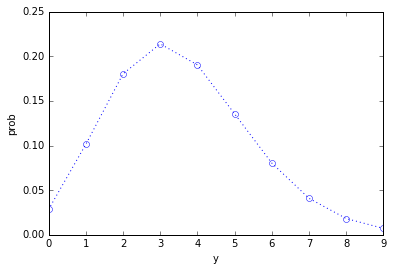

In [30]:
plt.plot(y, prob, linestyle='dotted', marker='o', fillstyle='none')
plt.xlabel('y')
plt.ylabel('prob')
plt.show()

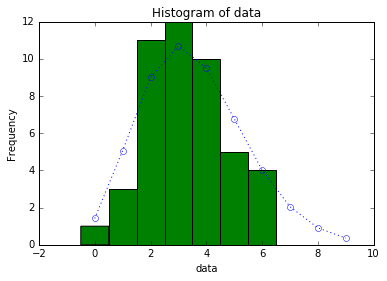

In [34]:
# See relationship between the histogram and the pmf of poission distribution
plt.plot(y, prob.mul(50), linestyle='dotted', marker='o', fillstyle='none') # Note that we multiply prob by 50
plt.hist(data, bins=np.arange(-0.5, 7.5, 1))
plt.title('Histogram of data')
plt.xlabel('data')
plt.ylabel('Frequency')
plt.show()

## Section 2.3

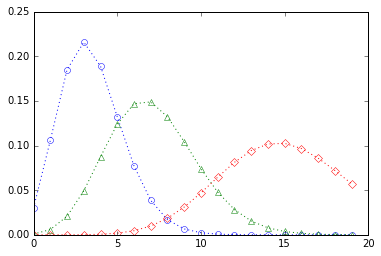

In [36]:
# Poission distributions whose lambdas are 3.5, 7.1, 15.1
y = np.arange(0, 20)
prob1 = pd.Series(poisson.pmf(y, 3.5), index=y)
prob2 = pd.Series(poisson.pmf(y, 7.1), index=y)
prob3 = pd.Series(poisson.pmf(y, 15.1), index=y)
plt.plot(y, prob1, linestyle='dotted', marker='o', fillstyle='none')
plt.plot(y, prob2, linestyle='dotted', marker='^', fillstyle='none')
plt.plot(y, prob3, linestyle='dotted', marker='D', fillstyle='none')
plt.show()

## Section 2.4

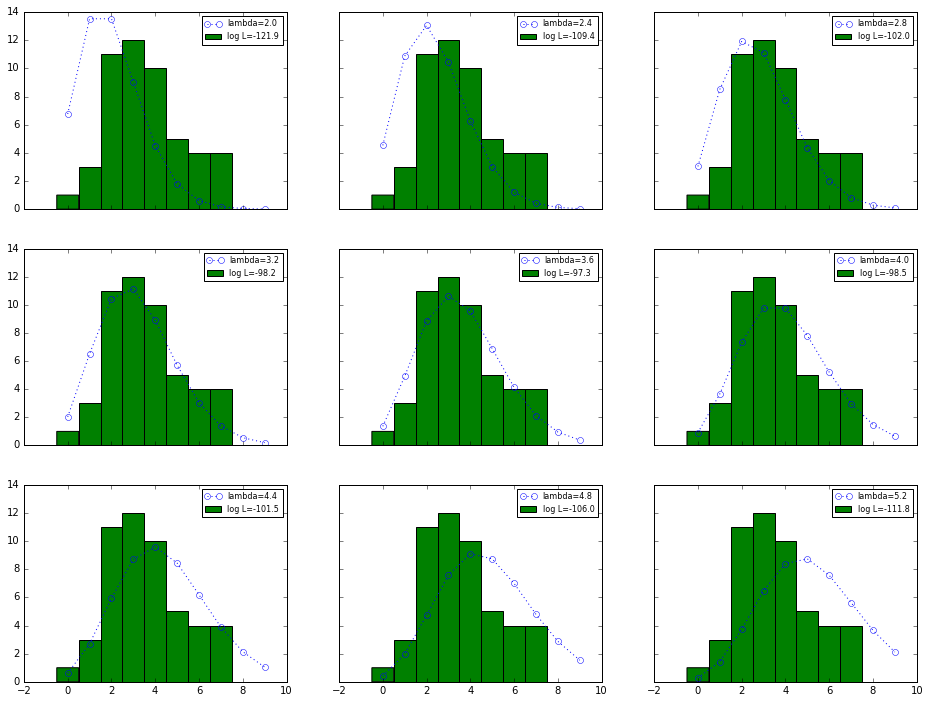

In [71]:
# Pick up relationship between lambda and log likelihood
y = np.arange(0, 10)
lambdas = np.arange(2.0, 5.6, 0.4)

fig, axes = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(16, 12))
for i in range(9):
    l = lambdas[i]
    prob = pd.Series(poisson.pmf(y, l), index=y)
    log_likelihood = sum(poisson.logpmf(data, l))
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.plot(prob.mul(50), linestyle='dotted', marker='o', fillstyle='none', label='lambda={0:.1f}'.format(l))
    ax.hist(data, bins=np.arange(-0.5, 8.5, 1.0), label='log L={0:.1f}'.format(log_likelihood))
    ax.legend(loc='upper right', fontsize=8)
plt.show()

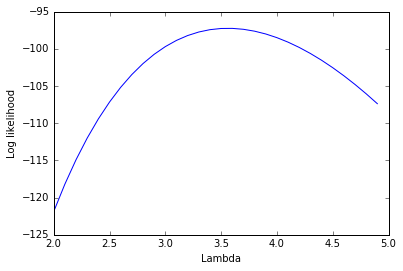

In [76]:
# Plot relationship between lambda and log likelihood
lambdas = np.arange(2, 5, 0.1)
logL = [sum(poisson.logpmf(data, l)) for l in lambdas]
plt.plot(l, logL)
plt.xlabel('Lambda')
plt.ylabel('Log likelihood')
plt.show()

## Section 2.4

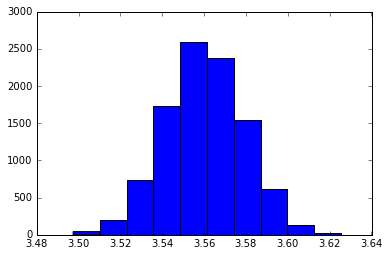

In [89]:
# Display the histogram of random numbers generated by poisson distribution (lambda = 3.56)
res = [np.random.poisson(3.56, 10000).mean() for i in range(10000)]
plt.hist(res)
plt.show()